In [36]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
location = "datasets/CC GENERAL.csv"
df = pd.read_csv(location)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


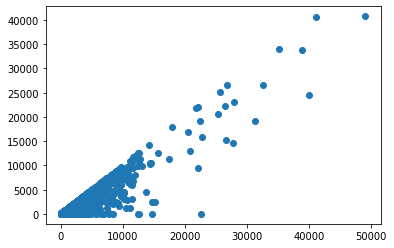

In [38]:
plt.scatter(df['PURCHASES'],df['ONEOFF_PURCHASES'])

In [39]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


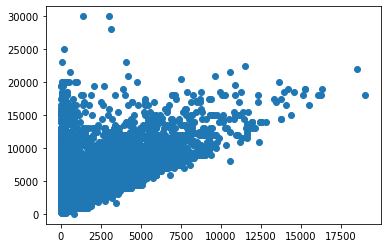

In [40]:
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'])
#CREDIT_LIMIT
#PAYMENTS

In [41]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [42]:
temp = df.groupby('TENURE')['CUST_ID'].nunique()
temp
#*_FREQUENCY,PRC_FULL_PAYMENT,TENURE

TENURE
6      204
7      190
8      196
9      175
10     236
11     365
12    7584
Name: CUST_ID, dtype: int64

In [43]:
#bin it
#Define bins as 0-59, 60-69, 70-79, 80-89, 90-100
#bins = [-1, .25, .5, .75, 2]

# Create names for the four groups
#group_names = [0, 1, 2, 3]

#make new column with letter grades
#df['category'] = pd.cut(df['PURCHASES_FREQUENCY'], bins, labels=group_names)
#df.head()

In [44]:
X=df[['BALANCE','PAYMENTS']].copy()
X.head()

,BALANCE,PAYMENTS
0,40.900749,201.802084
1,3202.467416,4103.032597
2,2495.148862,622.066742
3,1666.670542,0.000000
4,817.714335,678.334763


In [45]:
#y = df['category'].copy()
#y.head()

In [46]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
print(kmeans.cluster_centers_)

[[  821.74478796   942.30048648]
 [ 5845.88788348  1929.81593233]
 [ 2374.83485721  6738.82172667]
 [ 5255.86552269 23857.34382014]]


In [48]:
#plt.scatter(df['BALANCE'],df['PAYMENTS'], c=df['category'], cmap= 'rainbow')
#plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [49]:
df['cluster'] = kmeans.labels_

In [50]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


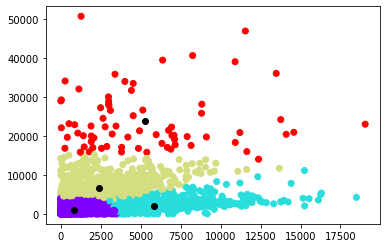

In [51]:
plt.scatter(df['BALANCE'],df['PAYMENTS'], c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Red: high payments, any balance
#### Yellow: medium payments, any balance
#### Purple: low balance, low payments
#### Blue: high balance, low payments

In [52]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
df = df.drop('cluster', axis=1)
df['cluster'] = kmeans.labels_

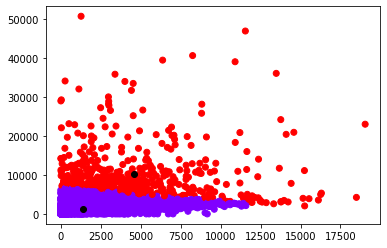

In [54]:
plt.scatter(df['BALANCE'],df['PAYMENTS'],c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Red: high payments, all balances
#### Purple: low payments, all balances

In [55]:
df=df.loc[df['CREDIT_LIMIT'].notnull()]

In [56]:
Z=df[['BALANCE','CREDIT_LIMIT']].copy()
Z.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [57]:
Z.count()

BALANCE         8949
CREDIT_LIMIT    8949
dtype: int64

In [58]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
df = df.drop('cluster', axis=1)
df['cluster'] = kmeans.labels_

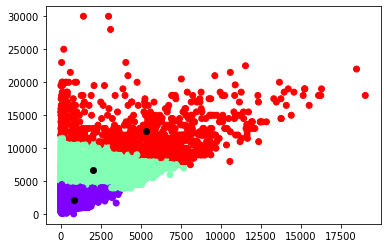

In [60]:
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'],c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Red: high credit limit, balance includes full range
#### Green: medium credit limit, balance low to mid range
#### Purple: low credit limit, balance in lower range

In [61]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
df = df.drop('cluster', axis=1)
df['cluster'] = kmeans.labels_

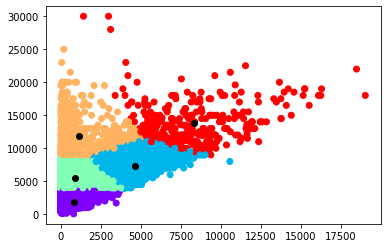

In [64]:
plt.scatter(df['BALANCE'],df['CREDIT_LIMIT'],c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Orange: low balance, high credit limit
#### Red: high balance, high credit limit
#### Green: low balance, medium credit limit
#### Blue: medium balance, medium credit limit
#### Purple: low balance, low credit limit

In [65]:
A=df[['PAYMENTS','CREDIT_LIMIT']].copy()
A.head()

,PAYMENTS,CREDIT_LIMIT
0,201.802084,1000.0
1,4103.032597,7000.0
2,622.066742,7500.0
3,0.000000,7500.0
4,678.334763,1200.0


In [66]:
A.count()

PAYMENTS        8949
CREDIT_LIMIT    8949
dtype: int64

In [67]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
df = df.drop('cluster', axis=1)
df['cluster'] = kmeans.labels_

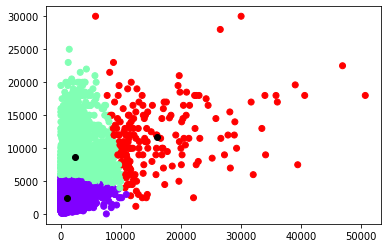

In [69]:
plt.scatter(df['PAYMENTS'],df['CREDIT_LIMIT'],c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Green: low payment, high credit limit
#### Red: high payment, all credit limits
#### Purple: low payment, low credit limit

In [70]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(A)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
df = df.drop('cluster', axis=1)
df['cluster'] = kmeans.labels_

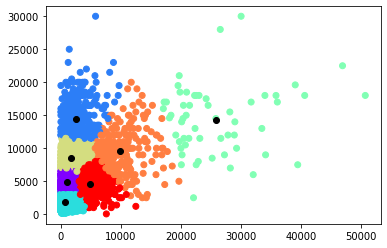

In [72]:
plt.scatter(df['PAYMENTS'],df['CREDIT_LIMIT'],c=df['cluster'], cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

#### Light Blue, Purple, Yellow, Blue: low payment, increasingly greater credit limit
#### Red, Orange: medium payment, increasingly greater credit limit
#### Green: high payment, all credit limits